In [2]:
import pandas as pd
import numpy as np


In [11]:


# Load datasets
city_data = pd.read_csv('GlobalLandTemperaturesByCity.csv')
country_data = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp = pd.read_csv('GlobalTemperatures.csv')

# View data structure
print(city_data.head())
print(country_data.head())
print(global_temp.head())



           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  
           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN 

In [12]:
# Convert date columns to datetime
city_data['dt'] = pd.to_datetime(city_data['dt'])
global_temp['dt'] = pd.to_datetime(global_temp['dt'])

# Handling missing data by filling with mean or interpolation
city_data['AverageTemperature'].fillna(city_data['AverageTemperature'].mean(), inplace=True)

# Resample the data on a yearly basis
global_temp.set_index('dt', inplace=True)
global_temp_yearly = global_temp.resample('Y').mean()


C:\Users\Shank\AppData\Local\Temp\ipykernel_12452\724815600.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  city_data['AverageTemperature'].fillna(city_data['AverageTemperature'].mean(), inplace=True)
C:\Users\Shank\AppData\Local\Temp\ipykernel_12452\724815600.py:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  global_temp_yearly = global_temp.resample('Y').mean()


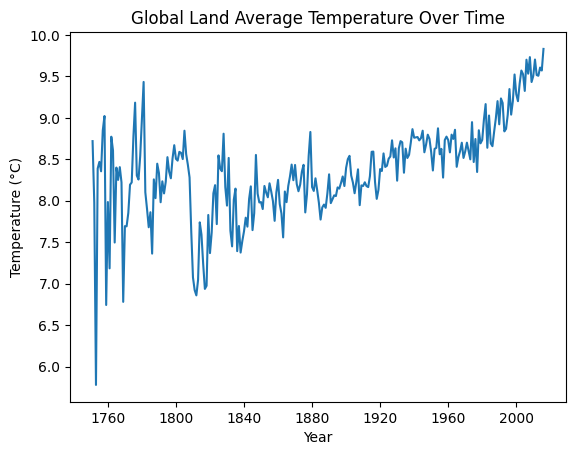

In [13]:
import matplotlib.pyplot as plt

# Plot global temperature trend over time
plt.plot(global_temp_yearly.index, global_temp_yearly['LandAverageTemperature'])
plt.title('Global Land Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()


In [14]:
# Create lag features
global_temp_yearly['temp_lag_5'] = global_temp_yearly['LandAverageTemperature'].shift(5)
global_temp_yearly['temp_lag_10'] = global_temp_yearly['LandAverageTemperature'].shift(10)

# Rolling mean to smooth data
global_temp_yearly['temp_rolling_mean'] = global_temp_yearly['LandAverageTemperature'].rolling(window=5).mean()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target
X = global_temp_yearly[['temp_lag_5', 'temp_lag_10', 'temp_rolling_mean']].dropna()
y = global_temp_yearly['LandAverageTemperature'].dropna()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


ValueError: Found input variables with inconsistent numbers of samples: [256, 266]

In [20]:
# Drop rows with missing values from the entire dataset
global_temp_yearly.dropna(inplace=True)

# Define features and target
X = global_temp_yearly[['temp_lag_5', 'temp_lag_10', 'temp_rolling_mean']]
y = global_temp_yearly['LandAverageTemperature']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Drop rows with missing values from the entire dataset
global_temp_yearly.dropna(inplace=True)

# Define features and target
X = global_temp_yearly[['temp_lag_5', 'temp_lag_10', 'temp_rolling_mean']]
y = global_temp_yearly['LandAverageTemperature']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
}

# Grid search for Random Forest
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 30, 'n_estimators': 200}


In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')


RMSE: 0.17205869617142255
R² Score: 0.7913708234389536


C:\python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


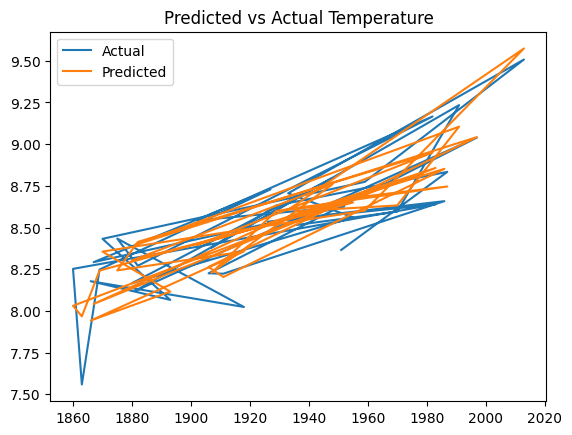

In [23]:
# Plot actual vs predicted temperatures
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.title('Predicted vs Actual Temperature')
plt.show()


In [27]:
import numpy as np
# Use the model to predict future temperature values
future_years = np.array([i for i in range(2024, 2040)]).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plot future projections
plt.plot(future_years, future_predictions, label='Predicted Future Temp')
plt.title('Future Global Temperature Projections (2024-2040)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


C:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

In [26]:
def generate_features(years):
    temp_lag_5 = np.roll(years, 5)[:-5]
    temp_lag_10 = np.roll(years, 10)[:-10]
    temp_rolling_mean = np.convolve(years, np.ones(10)/10, mode='valid')
    
    # Pad temp_lag_10 and temp_rolling_mean with NaNs to match the length of temp_lag_5
    temp_lag_10 = np.pad(temp_lag_10, (0, 5), mode='constant', constant_values=np.nan)
    temp_rolling_mean = np.pad(temp_rolling_mean, (0, 1), mode='constant', constant_values=np.nan)
    
    return np.column_stack((temp_lag_5, temp_lag_10, temp_rolling_mean))

In [29]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(global_temp_yearly[['LandAverageTemperature']].values)

# Prepare data for LSTM
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

sequence_length = 5
X, y = create_sequences(scaled_data, sequence_length)

# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)

# Predict future temperatures
predicted_temp = model.predict(X_test.reshape(-1, X_test.shape[1], 1))


Epoch 1/20


C:\python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2046
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0914 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0199 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0140 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0127 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0105 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0094 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0087 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0085 
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [30]:
### Enhance Model with External Features (CO2, Sea Level Data)

In [31]:
# Load additional data such as CO2 emissions and sea-level rise
co2_data = pd.read_csv('/path/to/co2_data.csv')
sea_level_data = pd.read_csv('/path/to/sea_level_data.csv')

# Merge with global temperature data on common date field
combined_data = global_temp_yearly.merge(co2_data, on='date').merge(sea_level_data, on='date')

# Use CO2 and sea level as additional features for the model
X = combined_data[['temp_lag_5', 'temp_lag_10', 'co2_emissions', 'sea_level']].dropna()
y = combined_data['LandAverageTemperature'].dropna()

# Train and evaluate the model with new features


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/co2_data.csv'